In [98]:
import pandas as pd

df = pd.read_csv('formula_e_race_results.csv', dtype={'race_name': pd.StringDtype(),
                                                      'driver': pd.StringDtype(),
                                                      'team': pd.StringDtype(),
                                                      'team_group': pd.StringDtype(),
                                                      'rank': pd.StringDtype(),
                                                      'grid': pd.StringDtype(),
                                                      'laps': pd.StringDtype(),
                                                      'time_retired': pd.StringDtype()})
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   season        1480 non-null   int64 
 1   race_num      1480 non-null   int64 
 2   race_name     1480 non-null   string
 3   race_date     1480 non-null   object
 4   driver        1480 non-null   string
 5   car           1480 non-null   int64 
 6   team          1480 non-null   string
 7   team_group    1480 non-null   string
 8   rank          1480 non-null   string
 9   rank_num      1480 non-null   int64 
 10  grid          1480 non-null   string
 11  laps          1480 non-null   string
 12  time_retired  1460 non-null   string
 13  pts_rank      1480 non-null   int64 
 14  pts_pole      1480 non-null   int64 
 15  pts_bonus     1480 non-null   int64 
 16  points        1480 non-null   int64 
dtypes: int64(8), object(1), string(8)
memory usage: 196.7+ KB


,season,race_num,race_name,race_date,driver,car,team,team_group,rank,rank_num,grid,laps,time_retired,pts_rank,pts_pole,pts_bonus,points
0,2,2,2015 Putrajaya,2015-11-07,Lucas di Grassi,11,ABT Schaeffler Audi Sport,Audi,1,1,6,33,50:17.449,25,0,0,25
1,1,4,2015 Buenos Aires,2015-01-10,António Félix da Costa,55,Amlin Aguri,Techeetah,1,1,8,35,48:52.100,25,0,0,25
2,5,1,2018 Ad Diriyah,2018-12-15,António Félix da Costa,28,Andretti-BMW,BMW-Andretti,1,1,1,33,46:29.377,25,3,0,28
3,6,2,2019 Diriyah race 2,2019-11-23,Alexander Sims,27,Andretti-BMW,BMW-Andretti,1,1,1,30,46:48.327,25,3,0,28
4,6,3,2020 Santiago,2020-01-18,Maximilian Günther,28,Andretti-BMW,BMW-Andretti,1,1,2,40,46:11.511,25,0,0,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,6,8,2020 Berlin race 3,2020-08-08,Neel Jani,18,Porsche,Porsche,Ret,24,18,10,Collision,0,0,0,0
1476,7,2,2021 Diriyah race 2,2021-02-27,Edoardo Mortara,48,Venturi-Mercedes,Venturi,DNS,24,21,0,Did not start,0,0,0,0
1477,6,4,2020 Mexico City,2020-02-15,Robin Frijns,4,Virgin-Audi,Virgin,DSQ,24,6,36,Energy usage1,0,0,0,0
1478,6,9,2020 Berlin race 4,2020-08-09,Robin Frijns,4,Virgin-Audi,Virgin,DNS,24,10,0,Did not start,0,0,0,0


<Axes: >

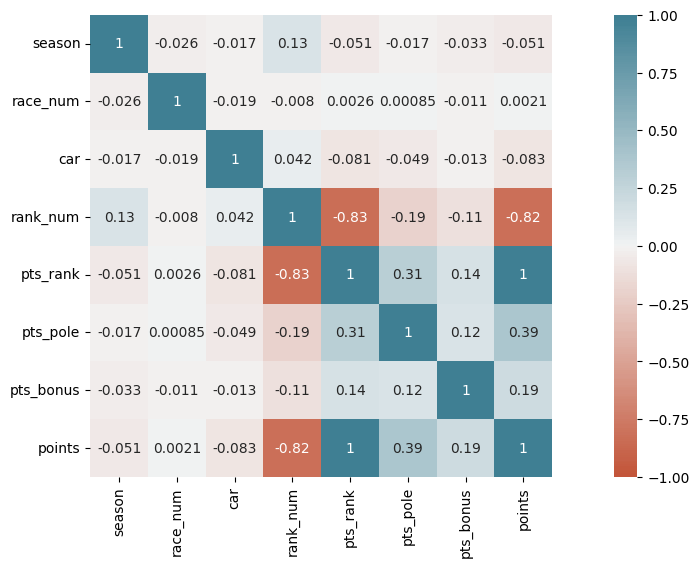

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(16,6))

sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, cmap=sns.diverging_palette(20,220, n=200), square=True)
#dato che più è piccolo il numero in classifica (rank_num), più punti si guadagnano per il campionato (points), 
#si ha una correlzaione fortemente negativa per quando riguarda questi 2 dati (-0.82)

In [100]:
#punti totali per i primi 20 piloti
df_points_tot = df[['points','driver']].groupby('driver').sum().sort_values(by=['points'], ascending=False).head(20)
df_points_tot

,points
driver,
Lucas di Grassi,802
Sébastien Buemi,783
Jean-Éric Vergne,663
Sam Bird,629
Daniel Abt,390
António Félix da Costa,381
Jérôme d'Ambrosio,322
Nico Prost,305
Mitch Evans,281


<Axes: xlabel='driver'>

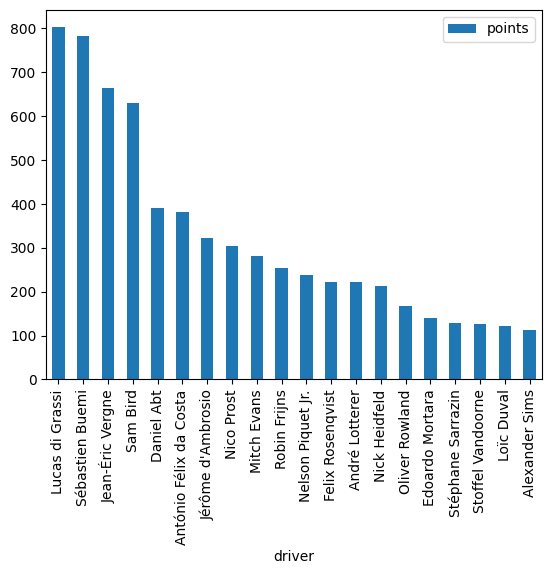

In [101]:
#punti totali per i primi 20 piloti
df_points_tot.plot(kind='bar')

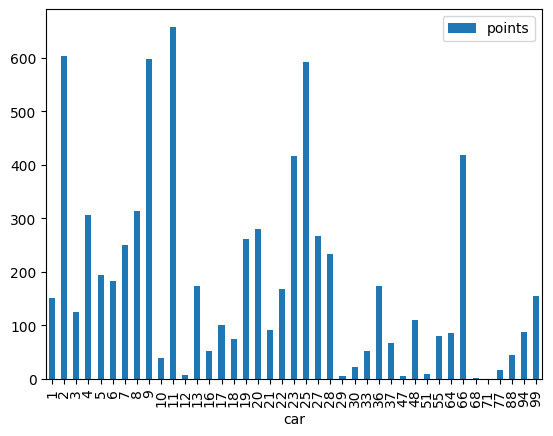

In [102]:
#punti totali per ogni pilota
df_points_tot = df[['points','car']].groupby('car').sum().plot(kind='bar').plot(kind='bar')

In [103]:
#punti totali per i primi 20 team
df_team_points_tot = df[['points','team']].groupby('team').sum().sort_values(by=['points'], ascending=False).head(20)
df_team_points_tot

,points
team,
Audi,600
Mahindra,567
Audi Sport ABT,542
Techeetah-DS,463
Techeetah-Renault,418
e.dams-Renault,393
Jaguar,383
Virgin-Audi,334
Andretti-BMW,332


<Axes: xlabel='team'>

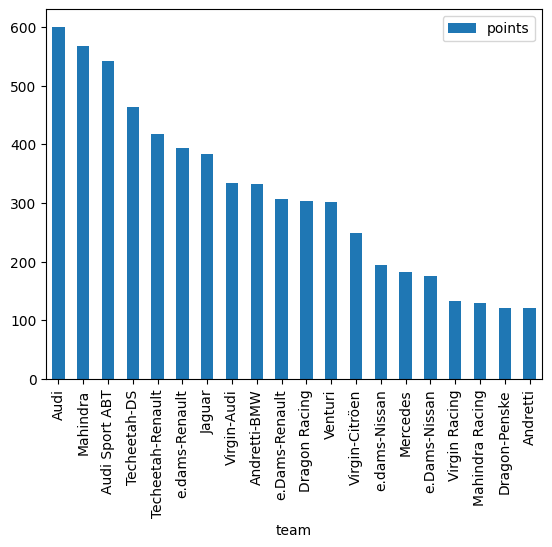

In [104]:
#punti totali per i primi 20 team
df_team_points_tot.plot(kind='bar')

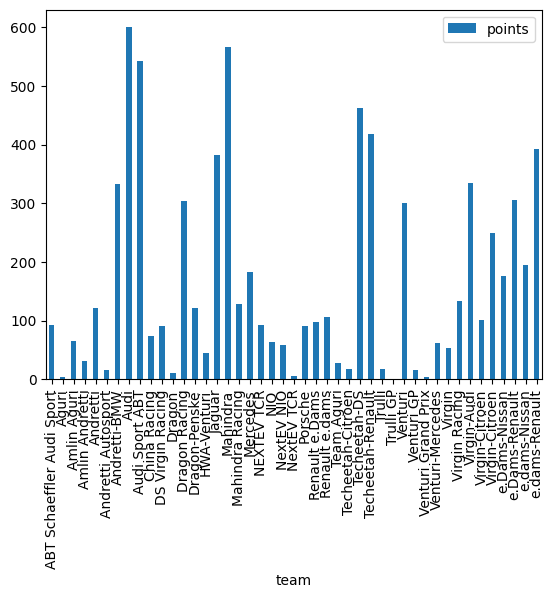

In [105]:
#punti totali per ogni team
df_team_points_tot = df[['points','team']].groupby('team').sum().plot(kind='bar')

In [106]:
#numero di vittorie per pilota

df_wins = df[df['rank_num'] == 1]
df_wins_tot = df_wins[['rank_num', 'driver']].groupby('driver').sum().sort_values(by=['rank_num'], ascending=False).head(20).reset_index()
df_wins_tot.columns = ['Piloti', 'Vittorie']

df_wins_tot

,Piloti,Vittorie
0,Sébastien Buemi,13
1,Sam Bird,10
2,Lucas di Grassi,10
3,Jean-Éric Vergne,9
4,António Félix da Costa,5
5,Felix Rosenqvist,3
6,Jérôme d'Ambrosio,3
7,Nico Prost,3
8,Nelson Piquet Jr.,2
9,Robin Frijns,2
